## Final Project Submission

Please fill out:
* Student name: Brycen Wong
* Student pace: self paced
* Scheduled project review, Wednesday 
* Instructor name: Eli
* Blog post URL: not ready yet


In [2]:
# clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses 
# as accurately as possible.

#add comments to code to explain process

#(seperate from python code) Power point presentation for nontechnical, ~5 minute presentation, ~5 minutes for Q&A
# 8-1500 word blog post about one facet of project, peers = intended audience


In [3]:
#Steps and substeps:

#Load libraries and dataset

# cursory glance at data: .head, .value_counts .info, .describe, 5point stats, take note of outliers and abnormalities

# look for and decide how to handle NA values. .isna.

# EDA, hist, boxplot, scatterplot, heat map, correlation table

# Create null and alt hypothesis, reject null hypothesis (not required)

# Fit a regression model

# Tinker with model to improve performance






In [4]:
#follow OSEMN model

# obtain, scrub, explore, model, iNterpret

# code must be well commented, easy to follow along

# Your project contains at least 4 meaningful data visualizations, with corresponding interpretations.
# All visualizations are well labeled with axes labels, a title, and a legend (when appropriate)
#You pose at least 3 meaningful questions and aswer them through EDA. 
#These questions should be well labled and easy to identify inside the notebook.
#Your model should not include any predictors with p-values greater than .05.
#Your notebook shows an iterative approach to modeling,
#and details the parameters and results of the model at each iteration.

In [5]:
# Your code here - remember to use markdown cells for comments as well!

In [6]:
# load libraries

import pandas as pd
import numpy as np
import statsmodels as sm
from statsmodels.api import formula

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# load dataset
# Obtain

df = pd.read_csv('kc_house_data.csv')

In [8]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [9]:
### Scrubbing

#Based on the objective, I believe 5 of the column variables are irrelevant to the target home price.
#The 5 columns below are irrelevant for our target, we'll be dropping them, 
# afterwards check for na values

In [10]:
#dropping id and date columns
df.drop(['id', 'date', 'lat', 'long', 'zipcode'], axis=1, inplace=True)

In [11]:
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,2390,7570


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(9), object(1)
memory usage: 2.6+ MB


In [13]:
np.round(df.describe())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0
mean,540297.0,3.0,2.0,2080.0,15099.0,1.0,0.0,0.0,3.0,8.0,1789.0,1971.0,84.0,1987.0,12758.0
std,367368.0,1.0,1.0,918.0,41413.0,1.0,0.0,1.0,1.0,1.0,828.0,29.0,400.0,685.0,27274.0
min,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,399.0,651.0
25%,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,1490.0,5100.0
50%,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,1840.0,7620.0
75%,645000.0,4.0,2.0,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,2360.0,10083.0
max,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,6210.0,871200.0


In [14]:
df.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
sqft_living15    False
sqft_lot15       False
dtype: bool

In [15]:
df.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
sqft_living15       0
sqft_lot15          0
dtype: int64

# wow the sqft_basement column has '?' values that don't register during the missing value check
# I would have completely missed it had it not appeared in the head()

#check values in sqft_basement
df.sqft_basement.value_counts()

In [16]:
# oh geez oh man, that's alot of people who put ?
# We'll replace with the average value, though I suppose it could also be interpreted as having no basement

#replacing missing data in sqft_basement with column mean
sqft_basement_numerical = df.sqft_basement[df.sqft_basement != '?']
sqft_basement_numerical = sqft_basement_numerical.astype(float)
sqft_basement_numerical_mean = round(sqft_basement_numerical.mean(),1)
df['sqft_basement'] = (df['sqft_basement'].map(lambda x: sqft_basement_numerical_mean if x == '?' else x)).astype(float)

In [17]:
df.sqft_basement.value_counts()

0.0       12826
291.9       454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
450.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
2600.0        1
2610.0        1
276.0         1
274.0         1
1245.0        1
143.0         1
266.0         1
862.0         1
2180.0        1
415.0         1
243.0         1
1135.0        1
1525.0        1
3000.0        1
172.0         1
225.0         1
518.0         1
935.0         1
1920.0        1
1930.0        1
1990.0        1
588.0         1
1548.0        1
2390.0        1
602.0         1
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Len

In [18]:
# 3 columns with NA's. more inspection
# view NA's are small enough, don't mind filling with zeroes.
# may be a leap of an assumption but I speculate yr_renovated NAs can be interpreted as no renovations
# have been made, equivalent to those who put 0 in the column, thus can fill with zeroes.
# Have to decide how to handle waterfront NAs, perhaps data withheld as it is a coveted feature
# seeing as it was just an item nonresponse as opposed to the entire observation rather confident it was withheld

# kind of ironic, that now I'm looking for predictors for the target variable waterfront, I assume price will correlate




In [19]:
df.yr_renovated.fillna(0, inplace = True)
df.view.fillna(0, inplace = True)
# oh geez, oh man, I forgot I had to specify inplace to make the changes permanent.
df.yr_renovated.head()

df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,291.9,1995,0.0,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,2390,7570


In [20]:
#make it categorical
df.waterfront.unique()

array([nan,  0.,  1.])

In [21]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [22]:
df_nowater = df[df.waterfront == 0]

df_nowater.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,1.907500e+04,19075.000000,19075.000000,19075.000000,1.907500e+04,19075.000000,19075.0,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000
mean,5.326420e+05,3.374836,2.112543,2073.524404,1.499112e+04,1.493997,0.0,0.203355,3.408965,7.652058,1785.875125,287.765699,1971.106841,65.202936,1982.052949,12729.486186
std,3.449592e+05,0.927144,0.764537,909.083746,4.077700e+04,0.539980,0.0,0.697446,0.649431,1.165675,824.965911,432.236990,29.391929,354.870703,680.982492,27593.553043
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.200000e+05,3.000000,1.750000,1420.000000,5.036500e+03,1.000000,0.0,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.589000e+03,1.500000,0.0,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7600.000000
75%,6.386000e+05,4.000000,2.500000,2540.000000,1.058400e+04,2.000000,0.0,0.000000,4.000000,8.000000,2210.000000,530.000000,1997.000000,0.000000,2350.000000,10031.500000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [23]:
df_water = df[df.waterfront == 1]

df_water.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,1.0,3.760274,3.541096,8.835616,2508.760274,736.456164,1962.280822,395.013699,2682.828767,22893.698630
std,1.145385e+06,1.099169,1.121509,1652.134956,44629.075899,0.547895,0.0,0.635770,0.743957,1.781233,1283.720489,802.144599,27.118576,796.174006,808.410448,23264.085993
min,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,0.000000,1.000000,5.000000,440.000000,0.000000,1905.000000,0.000000,750.000000,3230.000000
25%,8.275000e+05,3.000000,1.812500,2082.500000,11692.250000,1.000000,1.0,4.000000,3.000000,8.000000,1565.000000,0.000000,1941.250000,0.000000,2075.000000,11991.500000
50%,1.510000e+06,3.000000,2.500000,2900.000000,17730.500000,2.000000,1.0,4.000000,3.000000,9.000000,2200.000000,535.000000,1959.500000,0.000000,2695.000000,16260.500000
75%,2.282500e+06,4.000000,3.250000,4117.500000,26692.500000,2.000000,1.0,4.000000,4.000000,10.000000,3220.000000,1265.000000,1984.750000,0.000000,3140.000000,24537.500000
max,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,12.000000,7680.000000,4820.000000,2014.000000,2009.000000,4913.000000,192268.000000


In [24]:
df_na = df[df.waterfront.isna()]
df_na.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.376000e+03,2376.000000,2376.000000,2376.000000,2.376000e+03,2376.000000,0.0,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000
mean,5.294301e+05,3.361532,2.105745,2063.341330,1.530689e+04,1.486532,NaN,0.255892,3.408670,7.632576,1766.194865,297.344402,1970.675084,77.252946,1980.507576,12366.675084
std,3.250794e+05,0.908079,0.764266,881.380488,4.595495e+04,0.535898,NaN,0.783089,0.652826,1.150238,794.747951,437.015304,29.302970,385.011478,689.428551,24694.192000
min,8.000000e+04,1.000000,0.750000,430.000000,6.000000e+02,1.000000,NaN,0.000000,1.000000,4.000000,430.000000,0.000000,1900.000000,0.000000,780.000000,788.000000
25%,3.228750e+05,3.000000,1.500000,1430.000000,5.031750e+03,1.000000,NaN,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1470.000000,5108.000000
50%,4.450000e+05,3.000000,2.250000,1900.000000,7.607000e+03,1.500000,NaN,0.000000,3.000000,7.000000,1550.000000,0.000000,1973.000000,0.000000,1820.000000,7624.500000
75%,6.496125e+05,4.000000,2.500000,2520.000000,1.052475e+04,2.000000,NaN,0.000000,4.000000,8.000000,2190.000000,590.000000,1996.000000,0.000000,2370.000000,10001.250000
max,3.200000e+06,8.000000,6.500000,7730.000000,1.074218e+06,3.500000,NaN,4.000000,5.000000,12.000000,6660.000000,2160.000000,2015.000000,2015.000000,4940.000000,311610.000000


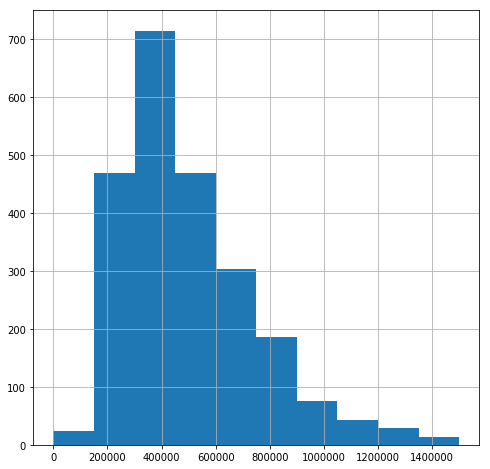

In [25]:
df_na.price.hist(bins = 10, figsize = (8,8), range = (0,1500000))


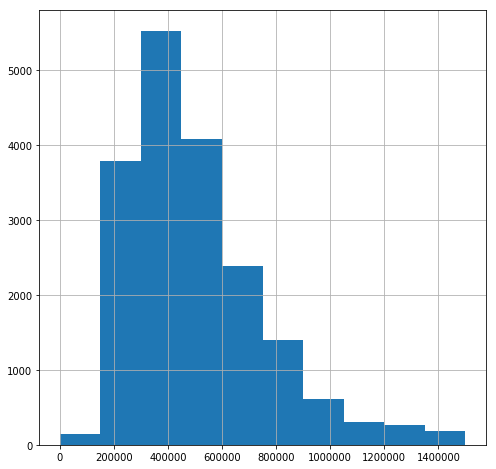

In [26]:
df_nowater.price.hist(bins =10, figsize = (8,8), range = (0,1500000) )


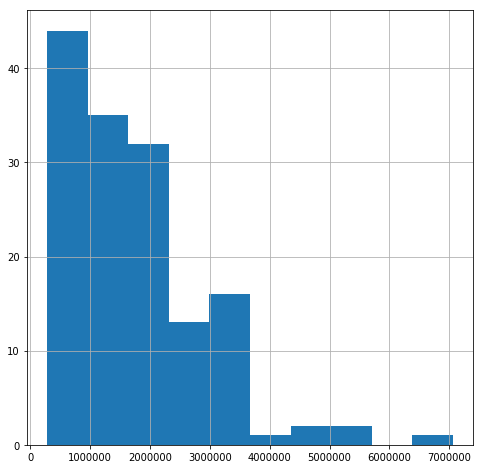

In [27]:
df_water.price.hist(bins = 10, figsize = (8,8))

In [28]:
#after an excruciatingly long time deliberating how to handle the waterfront missing values, I have decided to impute 0 
# for the NA values as their price distribution is much more similar to houses without a waterfront

df.waterfront.fillna(0, inplace = True)



#### EDA

Time to run initial visualizations to view the distributions of the variables, looking to achieve a normal distribution thru transformations.


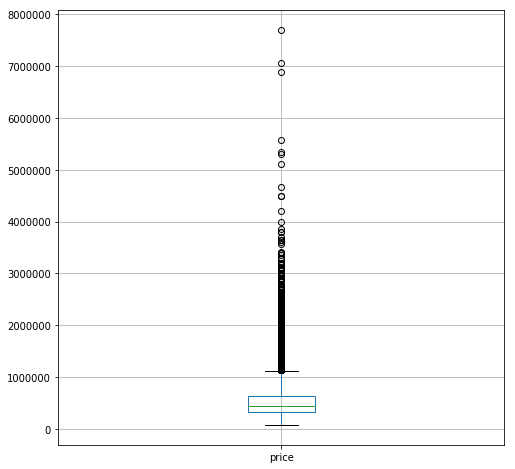

In [29]:
df.boxplot(column = 'price', figsize = (8,8))


In [30]:
#That's alot of outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000166D37E95C0>,
      dtype=object)

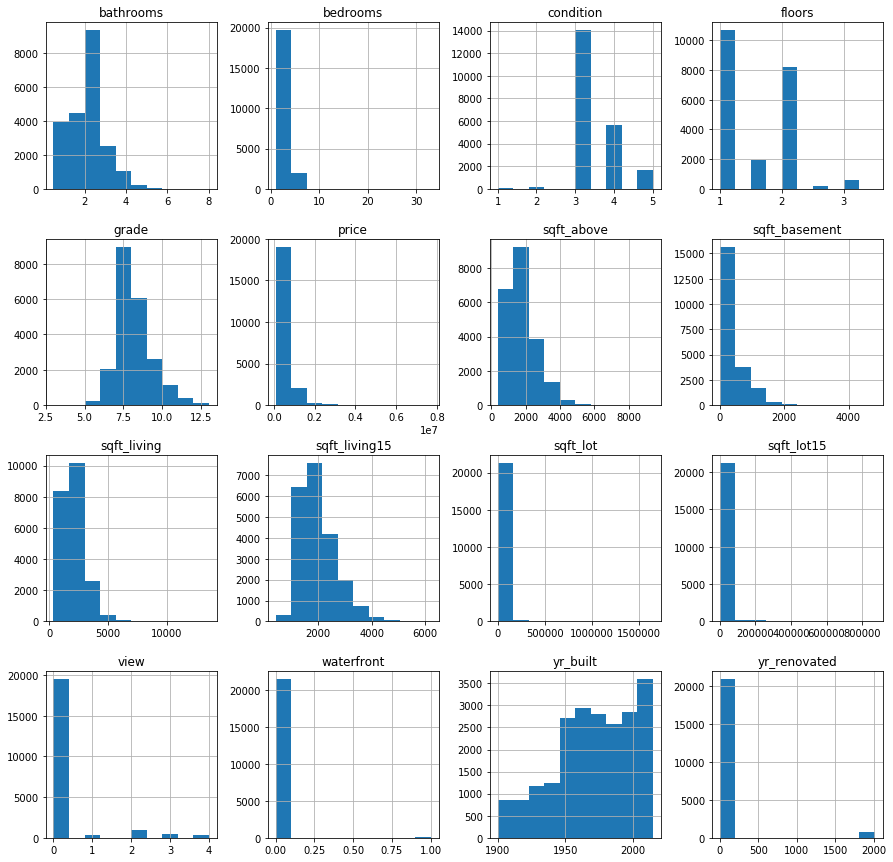

In [31]:
#histogram of all variables
df.hist(figsize=(15,15))

In [32]:
# So cursory glance, not much in the way of normal distributions, and many outliers. We'll have to do something about that
# Go through each column and make them conform

In [33]:
# number of bed/bath is one of those facets that's apart of the conversation, so I'll start there

print(df.bathrooms.value_counts())
print(df.bedrooms.value_counts())

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


In [34]:
# Gee, 33 bedrooms, is that legal? Questionable if that is a true value or recording error.
#I wonder what a quarter of a bathroom entails.

# Guess we gotta drop the outliers



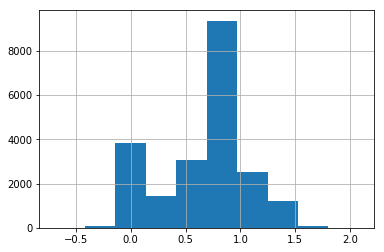

In [35]:
# log transform bathroom column, should make it more normal
df.bathrooms = np.log(df.bathrooms)

df.bathrooms.hist()

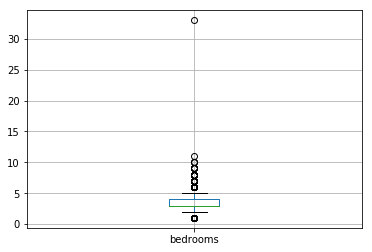

In [36]:
df.boxplot(column = 'bedrooms') 
#boy an outlier among outliers.

In [51]:
df.drop(df.index[df['bedrooms'] >= 33], inplace=True)

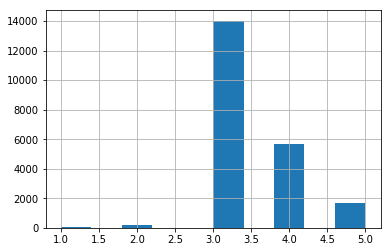

In [37]:
df.condition.hist()
# seems like most report the condition as average, with very few self reporting less than 3/5

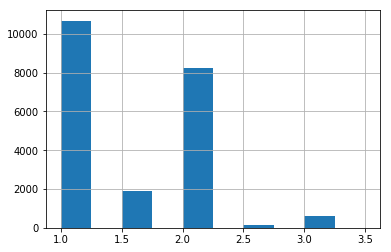

In [38]:
df.floors.hist()
#majority of houses are 1-2 floors, what does half a floor entail?

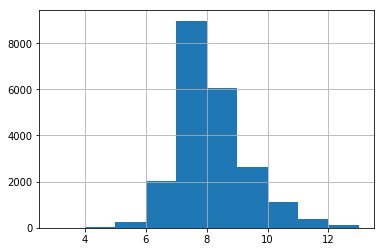

In [39]:
df.grade.hist()
#this distribution is normal ish, maybe slight positive skew? how are grades measured?

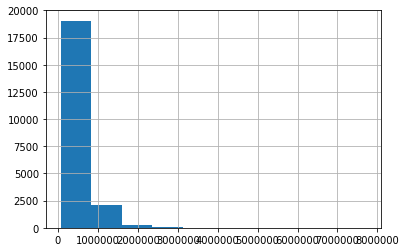

In [40]:
df.price.hist()

#ok, can't interpret much from this, let's boxplot

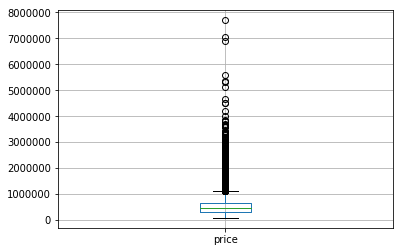

In [41]:
df.boxplot(column = 'price')

In [42]:
# Wow, bunch of high priced outliers.

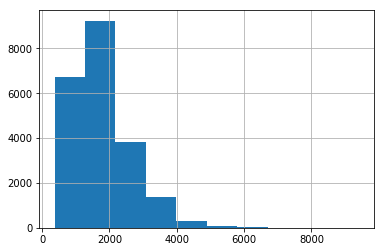

In [43]:
df.sqft_above.hist()

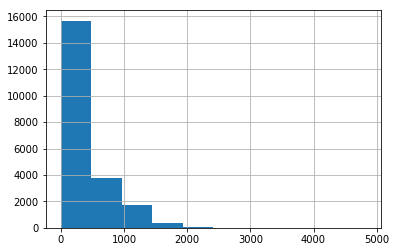

In [44]:
df.sqft_basement.hist()

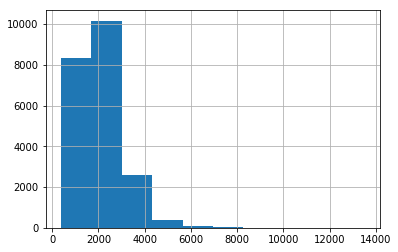

In [45]:
df.sqft_living.hist()

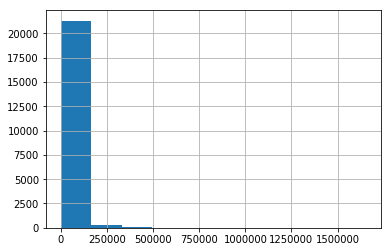

In [46]:
df.sqft_lot.hist()

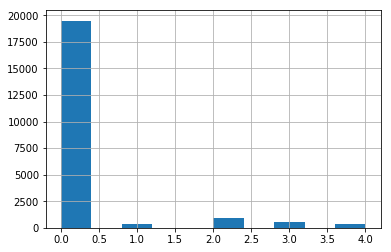

In [47]:
df.view.hist()

In [49]:
# so what does view entail? like it's been viewed on a website? I don't see the value in this column
# considering how many zeros there are, especially if I can't understand it

df.drop('view', axis = 1, inplace = True)

In [50]:
df.columns


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

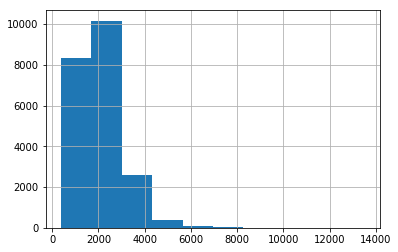

In [52]:
df.sqft_living.hist()


In [53]:
#checking count of outliers
print(len(df[df.sqft_living > 8000]))
print(len(df[df.sqft_living > 6000]))
print(len(df[df.sqft_living > 4000]))

9
68
782


In [54]:
#removing outliers
df.drop(df.index[df['sqft_living'] > 6000], inplace=True)

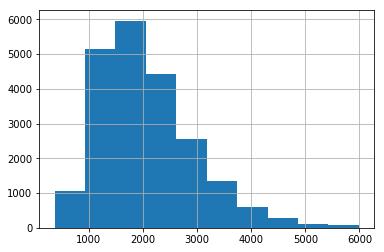

In [55]:
#histogram after removal of outliers
df.sqft_living.hist()

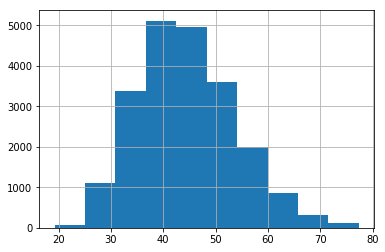

In [56]:
# There are many reasons to conduct a transformation:
# convenience, standardize, reduce skew, etc
# It took awhile for me to comprehend that this is a valid technique that maintains the integrity of the data, I almost have
# to ask, how much fiddling can you do with the data before it's no longer valid?

#histogram of square root transformed sqft_living, we are doing this to reduce skew.
(np.sqrt(df.sqft_living)).hist()